<a href="https://colab.research.google.com/github/Rugved2204/pytorch_fundamentals/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have used dome datasets with Pytorch before

Nut how do you get your own data into pytorch

One of the ways to do it is via custom datasets

In [1]:
import torch
from torch import nn
torch.__version__

'2.0.1+cu118'

In [2]:
#Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
!nvidia-smi


/bin/bash: nvidia-smi: command not found


#Get Data

Our dataset is a subset of the Food101 dataset

Food101 starts 101 different classes of food and 1000 images per class

Our dataset starts with 3 classes of food and only 10% of the images



In [4]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path / "pizz_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists ......skipping download ")
else:
  print(f"{image_path} does not exist, creating one ....")
  image_path.mkdir(parents = True, exist_ok=True)

with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading data")
  f.write(request.content)

#Unzipping the zip file
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza,steak and sushi data")
  zip_ref.extractall(image_path)

data/pizz_steak_sushi does not exist, creating one ....
Unzipping pizza,steak and sushi data


In [5]:
#Becoming one with the data

In [6]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizz_steak_sushi'
There are 3 directories and 0 images in 'data/pizz_steak_sushi/train'
There are 0 directories and 78 images in 'data/pizz_steak_sushi/train/pizza'
There are 0 directories and 72 images in 'data/pizz_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizz_steak_sushi/train/steak'
There are 3 directories and 0 images in 'data/pizz_steak_sushi/test'
There are 0 directories and 25 images in 'data/pizz_steak_sushi/test/pizza'
There are 0 directories and 31 images in 'data/pizz_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizz_steak_sushi/test/steak'


In [9]:
image_path

PosixPath('data/pizz_steak_sushi')

In [8]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizz_steak_sushi/train'),
 PosixPath('data/pizz_steak_sushi/test'))

data/pizz_steak_sushi/train/sushi/424994.jpg
sushi
Random image path: data/pizz_steak_sushi/train/sushi/424994.jpg
Image class: sushi
Image height: 382
Image width: 512


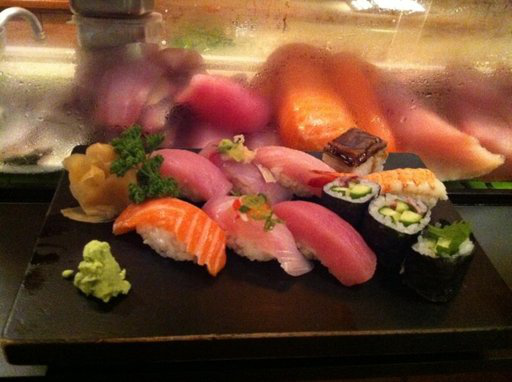

In [19]:
import random
from PIL import Image

#

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list


random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem

print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 381.5, -0.5)

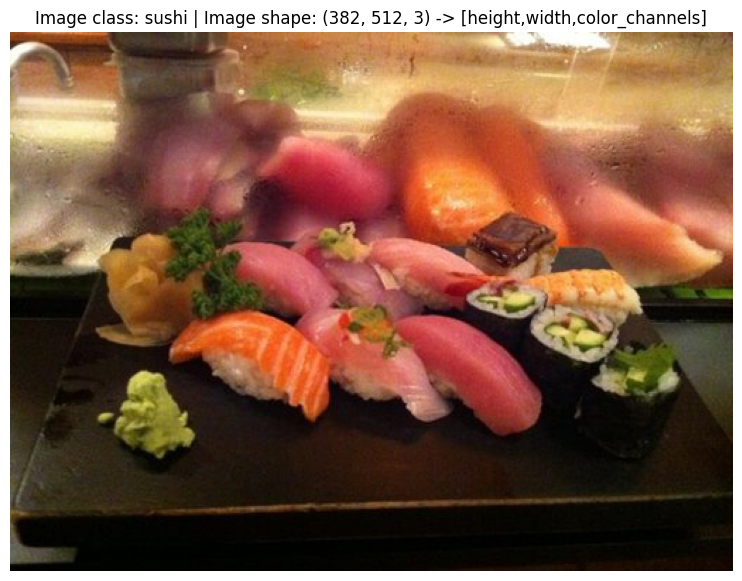

In [20]:
import numpy as np
import matplotlib.pyplot as plt
#Turning th image into an array
img_as_array=np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height,width,color_channels]")
plt.axis(False)

In [21]:
img_as_array

array([[[145,  83,  32],
        [143,  80,  29],
        [143,  80,  29],
        ...,
        [105,  69,  47],
        [107,  71,  49],
        [116,  79,  60]],

       [[141,  78,  27],
        [142,  76,  26],
        [141,  75,  25],
        ...,
        [109,  73,  49],
        [105,  69,  47],
        [104,  67,  48]],

       [[142,  76,  26],
        [143,  75,  26],
        [142,  74,  25],
        ...,
        [115,  79,  55],
        [110,  74,  52],
        [104,  68,  46]],

       ...,

       [[  3,   3,   3],
        [  3,   3,   3],
        [  2,   2,   0],
        ...,
        [ 18,   4,   1],
        [ 18,   4,   1],
        [ 18,   4,   1]],

       [[  3,   3,   3],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [ 19,   5,   2],
        [ 19,   5,   2],
        [ 19,   5,   2]],

       [[  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 21,   7,   4],
        [ 20,   6,   3],
        [ 19,   5,   2]]

Before we can use our image data with Pytorch

1. Turn it into tensors
2. Turn it into 'torch.utils.data.Dataset' and subsequently a torch.utils.

In [22]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#Write a transform for image
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [25]:
data_transform(img).shape
#We transformed this image into tensor

torch.Size([3, 64, 64])

Transforms help you get your images ready to be used

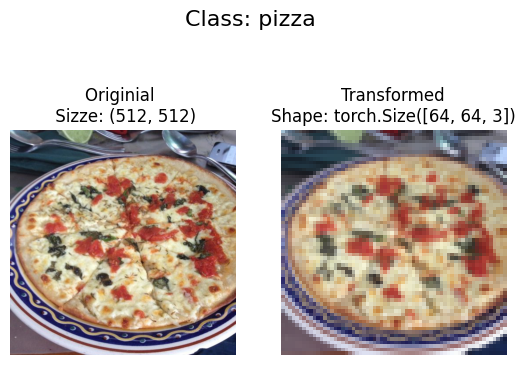

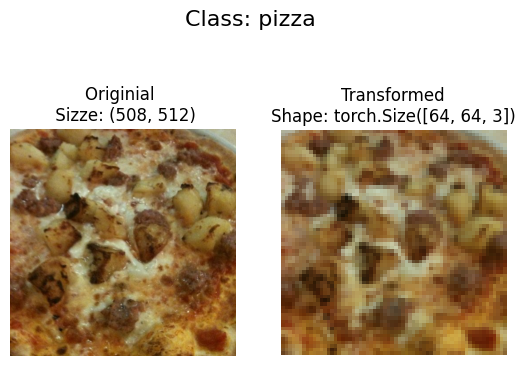

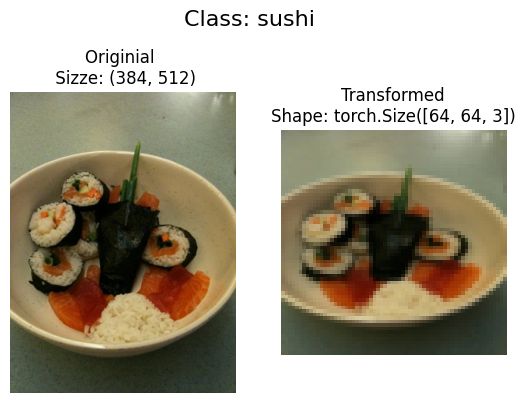

In [27]:
def plot_transformed_images(image_paths,transform,n=3,seed=42):
  """Selects random images from a path of images and transforms
  them,then plots the origninal vs the transformed version
  """

  if seed:

    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:

      fig,ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Originial \n Sizze: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform = data_transform,
                        n=3,
                        seed=42)


Loading Image data using Image folder

In [28]:
#We can load image classification data using torchvision.datasets.ImageFolder

In [30]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data= datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizz_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizz_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [31]:
train_dir,test_dir

(PosixPath('data/pizz_steak_sushi/train'),
 PosixPath('data/pizz_steak_sushi/test'))

In [32]:
train_data.classes

['pizza', 'steak', 'sushi']

In [33]:
class_names = train_data.classes

In [34]:
class_names

['pizza', 'steak', 'sushi']

In [35]:
len(train_data), len(test_data)

(225, 75)

In [37]:
train_data.targets[0]

0

In [38]:
train_data[0]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [39]:
img, label = train_data[0][0], train_data[0][1]

In [40]:
img,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [42]:
class_names[label]

'pizza'

In [43]:
img.shape

torch.Size([3, 64, 64])

In [44]:
img_permute = img.permute(1,2,0)

In [45]:
img.shape

torch.Size([3, 64, 64])

A dataloader helps to convert our dataset into batches...such that our hardware doesnt run out of space


In [46]:
import os
os.cpu_count()

2

In [55]:
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=2,
                              shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f39ff0fb550>,
 <torch.utils.data.dataloader.DataLoader at 0x7f39ff0fb1f0>)

In [50]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [56]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])
